In [1]:
%display typeset
%display latex
import sage.graphs.graph_plot
from sage.graphs.independent_sets import IndependentSets

Sage Math comes prepackaged with sufficiently powerfull graph theory utilities for our purposes. Below are some notes I touk when I was getting to know the sage math system as it relates to some basic graph calculations.

## Out of The Box Graph generators

SageMath comes with plenty of methods attatched to the `graphs` class. Below Is a code block showing 4 types of graphs being generated, the relevant parts here are the lines where the `graphs` class methods are being called i.e.
```python
K4 = graphs.CompleteGraph(4) #makes a complete graph on 4 vertices
C5 = graphs.CycleGraph(5) #makes a cycle graph on 5 vertices
K32 = graphs.CompleteBipartiteGraph(3,2) #Makes a 3,2 complete Bipartite graph
House = graphs.HouseGraph() #Makes a house graph (No args needed)
```

Everything else is just some code to make the displays nice

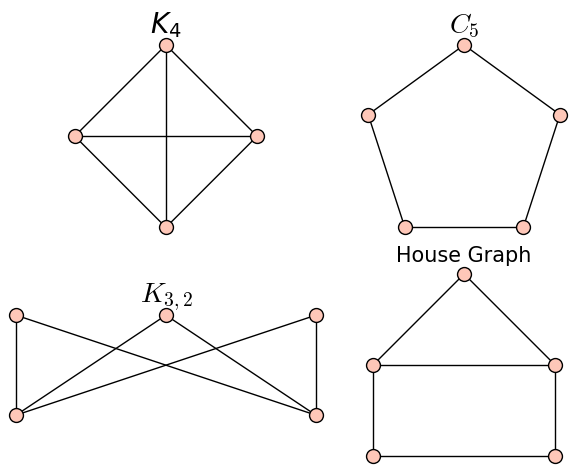

In [2]:
K4 = graphs.CompleteGraph(4) ; K4Name = r'$K_4$'
C5 = graphs.CycleGraph(5) ; C5Name = r'$C_5$'
K32 = graphs.CompleteBipartiteGraph(3,2) ; K32Name = r'$K_{3,2}$'
House = graphs.HouseGraph() ; HouseName = "House Graph"

#change some default params
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['vertex_size'] = 100
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['vertex_labels'] = False


GArr = graphics_array(
    [
        [K4.plot(title=K4Name,fontsize=20),C5.plot(title=C5Name,fontsize=20)],
        [K32.plot(title=K32Name,fontsize=20),House.plot(title=HouseName,fontsize=15)]
    ])
GArr.show()

#reset parameters
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['vertex_size'] = 200
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS['vertex_labels'] = True

## Arbitrary Graph
To make an arbitrary graph a user has to specify the number of vertices and the edges. This is diffrent as above since to initalize a graph the `Graph(n)` function is used instead of calling methods from the `graphs` class. Then One adds the edges by using the vertex index (by default 0-indexed) in the `.add_edge(n,m)` method on the graph object.

Here the important parts are where the empty graph is initalized and the edges are added afterwords,
```python
MyGraph = Graph(5) #make empty graph on 5 edges

#Now I add the edgs by using their indices and the .add_edge() method
MyGraph.add_edge(3,1)
MyGraph.add_edge(2,3)
MyGraph.add_edge(0,1)
MyGraph.add_edge(2,0)
MyGraph.add_edge(4,1)
MyGraph.add_edge(4,2)

```

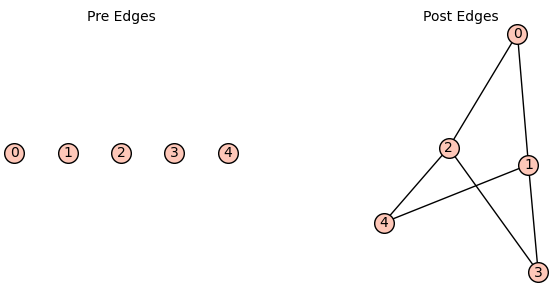

In [3]:
#i can use data to make graphs aswell

#make a 5 vertex graph and a copy
g = Graph(5)
g1 = g.copy()

#add edges to make it weird
g1.add_edge(3,1)
g1.add_edge(2,3)
g1.add_edge(0,1)
g1.add_edge(2,0)
g1.add_edge(4,1)
g1.add_edge(4,2)

GArr = graphics_array( [g.plot(title="Pre Edges"),g1.plot(title="Post Edges")])

GArr.show(figsize=[8, 3])

Arbitrary graphs can also be made in fewer lines. If the edges are know before hand one can just use the `.add_edges()` method on the graph instead of a bunch of `.add_edge()` calls, this dose require a python `list` object containing multiple `touple` objects each representing an edge.

```python
#Make a graph
MyGraph = Graph(5)

#make a list of tuples that show the edges i want to make
#here I specify the edges 01,12,23,34, and 50
E = [
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (5,0)
    ]

#now actualy put those edges on the graph
MyGraph.add_edges(E)
```

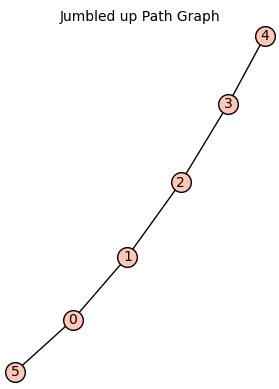

In [4]:
MyGraph = Graph(5)
E = [
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (5,0)
]

MyGraph.add_edges(E)
MyGraph.plot(title="Jumbled up Path Graph")

This can actualy be done in one fewer line by just using the python `list` as the only argument in `Graph()`. A possibley faster way can be to pass in a `Dictionary` object that specifies a vertices neighbors.

```python
#Pass in the edge list directly
MyGraph = Graph(E)

#make a dictionary specifying neighbor-ness by using a vertex as a key and a list of neighbors as a value
Neig = {
    1:[3,4,5],
    2:[6,7,8]}

MyGraph2 = Graph(Neig)
```

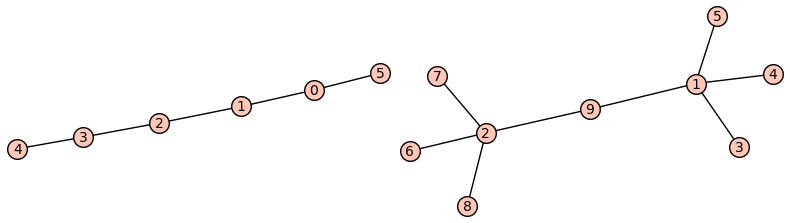

In [5]:
#specify edge list
E = [
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (5,0)
]
#make graph from edge list
MyGraph = Graph(E)

#specify neighbor dict
Neig = {
    1:[3,4,5],
    2:[6,7,8],
    9:[1,2]
}
#make graph from neighbor dictionary
MyGraph2 = Graph(Neig)

GArr = graphics_array([MyGraph.plot(), MyGraph2.plot()])
GArr.show(figsize=[8, 3])

As a side note both the vertices and edges of a graph object can be labelled. For vertices this seems to be as easy as just using a `string` instead of an integer when specifying the vertices. For edges this is done by modifing how the edges/neighborhoods are passed.

```python
#make a edge list using strings instead of integers for vertices
E_lab = {"N":["R","Mi","Ma","G"]}

#If I wanted to name the edges Instead,
# I need a dictionary with items of form 'v1':{v2:'v1_v2 label'}

E_lab_edg = {
    "N": {"R":1 , "Mi":2 , "Ma":3 , "G":4}
}

#make the graphs
V_lab = Graph(E_lab)
VE_lab = Graph(E_lab_edg)
```

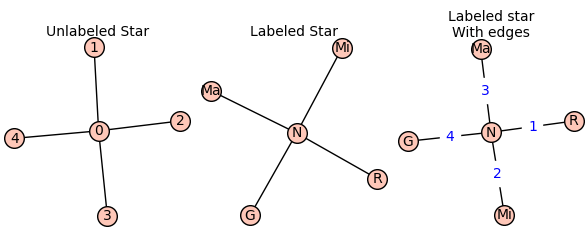

In [6]:
#unlabeled edge dict
E_unlab = {0:[1,2,3,4]}

#labeled vertices edge dict 
E_lab = {"N":["R","Mi","Ma","G"]}

#labeled vertices and edges dict
E_lab_edg = {
    "N": {"R":1 , "Mi":2 , "Ma":3 , "G":4}
}

#make the graphs
G1, G2, G3 = Graph(E_unlab), Graph(E_lab), Graph(E_lab_edg)

GArr = graphics_array([G1.plot(title="Unlabeled Star"),G2.plot(title="Labeled Star"),G3.plot(edge_labels=True,title="Labeled star\nWith edges")])

GArr.show()

As a closing note sage can handle DiGraphs, HyperGraphs, etc... The methods change slightly and some extra arguments need to be passed but it is possible.

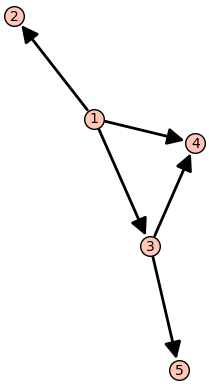

In [7]:
d = DiGraph({1:[2,3,4],3:[4,5]})

d.show()

## Calculations On Graphs
Sage math also has many methods and functions related to graph objects to get some standard stats, below is a list of some I found by trauling through the docs,

- Order/ Number of vertices
- Size/ Number of edges
- Degree Sequence
    - Gives Min/Max Degree by using `min()` and `max()` on the return
- Degree of a specific vertex 
- Neighborhood/set of neighbors of a specific vertex
    - actualy returns a `list` object despite `set` objects being a thing in python
- Distance between two vertices

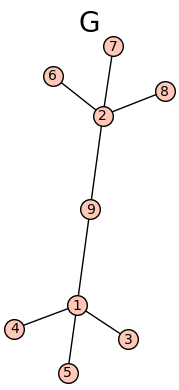

,,,,,,
,,,,,,


In [8]:
#make a test graph
Gdat = {
    1:[3,4,5],
    2:[6,7,8],
    9:[1,2]
}

G = Graph(Gdat)

#show the graph
G.show(title=r'G',fontsize=20)

#calculations
GDegreeSeq = G.degree_sequence()
G_deg_9 = G.degree(9)
GOrder = G.order()
GSize = G.size()
G_1_Neig = G.neighbors(1)

heading = [r'$\delta(G)$',
        r'$\Delta(G)$',
        r'$deg(9)$',
        r'$|V(G)|$',
        r'$|E(G)|$',
        r'$N[1]$',
        r'$d(8,1)$'
       ]
bod = [
    min(GDegreeSeq),
    max(GDegreeSeq),
    G_deg_9,
    GOrder,
    GSize,
    G_1_Neig,
    G.distance(1,8)
      ]

display(table([heading,bod]))

## Even Cooler Calculations on Graphs
Despite those previouse ones being tons usefull, sage math has implemented some algorythms to get more complicated graph properties such as,

- A Longest Path
    - As a Subgraph object even
- chromatic number
- chromatic index
- Independent Sets
    - This is implemented as its own function acting on a graph
- wheather or not Graph is planar
- wheather of not Graph is Hamiltonian

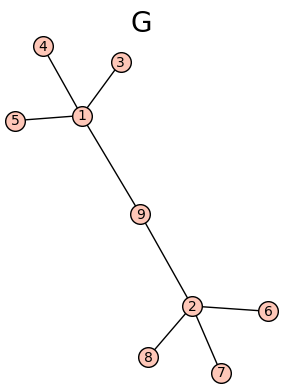

A Longest Path (list of vertices),,Chromatic Index,An Independent Set,Is G Planar,Is G Hamiltonian
,,,,,


In [10]:
#show the graph
G.show(title=r'G',fontsize=20)


LongestPath = G.longest_path().vertices()
ChiG = G.chromatic_number()
IG = G.chromatic_index()
ISets = IndependentSets(G)
IsPlane = G.is_planar()
IsHam = G.is_hamiltonian()

heading = [
    "A Longest Path\n(list of vertices)",
    r'$\chi(G)$',
    "Chromatic Index",
    "An Independent Set",
    "Is G Planar",
    "Is G Hamiltonian"
]

bod = [
    LongestPath,
    ChiG,
    IG,
    list(ISets)[-5],
    IsPlane,
    IsHam
]

Tab = table([heading,bod])

display(Tab)

## Small Things I made

In [35]:
# get distributions of max and min degree for G(n,n)
N = 1000
n_f = 10
n_i = 5

Data = {}

for n in range(n_i,n_f+1):
    #pick a specifc n to get graphs from G(n,n)
    
    #now start sampling
    Mins = []
    Maxs = []
    for i in range(N):
        #pick a rgaph and get its min and max degree
        g = graphs.RandomGNM(n,n)
        Ds = g.degree_sequence()
        minD = min(Ds)
        maxD = max(Ds)
        Mins.append(minD)
        Maxs.append(maxD)
        
    Data[n] = {"Min":Mins,"Max":Maxs}

In [42]:
from sage.plot.histogram import Histogram
g = Histogram(Data[5]["Min"], {})

show(g)

Histogram defined by a data list of size 1000